## 1. Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

%matplotlib inline

## 2. Загрузка данных

In [2]:
df = pd.read_csv('diabetes_dataset.csv')

## 3. Предварительный анализ данных

### 3.1. Первый взгляд на данные

In [3]:
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
display(df.head())

print("\nИнформация о данных:")
df.info()

Размер датасета: (9538, 17)

Первые 5 строк:


,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null

### 3.2. Описательная статистика

In [4]:
print("\nОписательная статистика числовых признаков:")
display(df.describe().T)



Описательная статистика числовых признаков:


,count,mean,std,min,25%,50%,75%,max
Age,9538.0,53.577584,20.764651,18.00,36.00,53.00,72.00,89.00
Pregnancies,9538.0,7.986161,4.933469,0.00,4.00,8.00,12.00,16.00
BMI,9538.0,27.052364,5.927955,15.00,22.87,27.05,31.18,49.66
Glucose,9538.0,106.104183,21.918590,50.00,91.00,106.00,121.00,207.20
BloodPressure,9538.0,84.475781,14.123480,60.00,74.00,84.00,94.00,138.00
HbA1c,9538.0,4.650661,0.476395,4.00,4.30,4.60,5.00,6.90
LDL,9538.0,100.133456,29.911910,-12.00,80.10,99.90,120.20,202.20
HDL,9538.0,49.953418,15.242194,-9.20,39.70,50.20,60.20,107.80
Triglycerides,9538.0,151.147746,48.951627,50.00,117.20,150.55,185.10,345.80
WaistCircumference,9538.0,93.951678,15.594468,40.30,83.40,93.80,104.60,163.00


### 3.3. Проверка на пропущенные значения

In [5]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64


## 4. Анализ целевой переменной (Outcome)

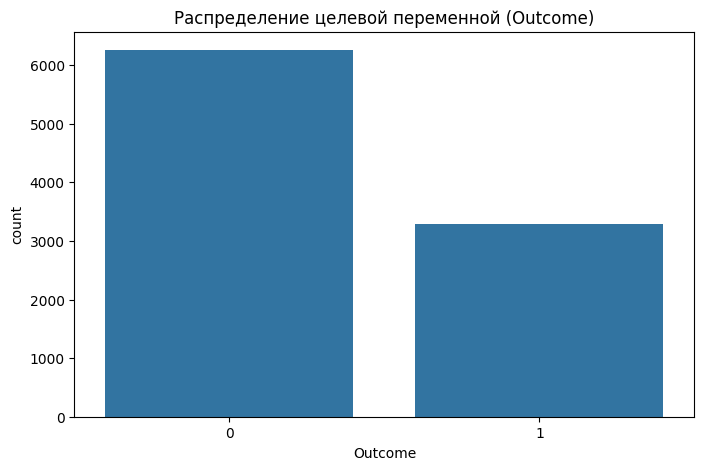


Баланс классов:
Outcome
0    0.655903
1    0.344097
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outcome', data=df)
plt.title('Распределение целевой переменной (Outcome)')
plt.show()

print("\nБаланс классов:")
print(df['Outcome'].value_counts(normalize=True))

## 5. Анализ числовых признаков

### 5.1. Распределение числовых признаков

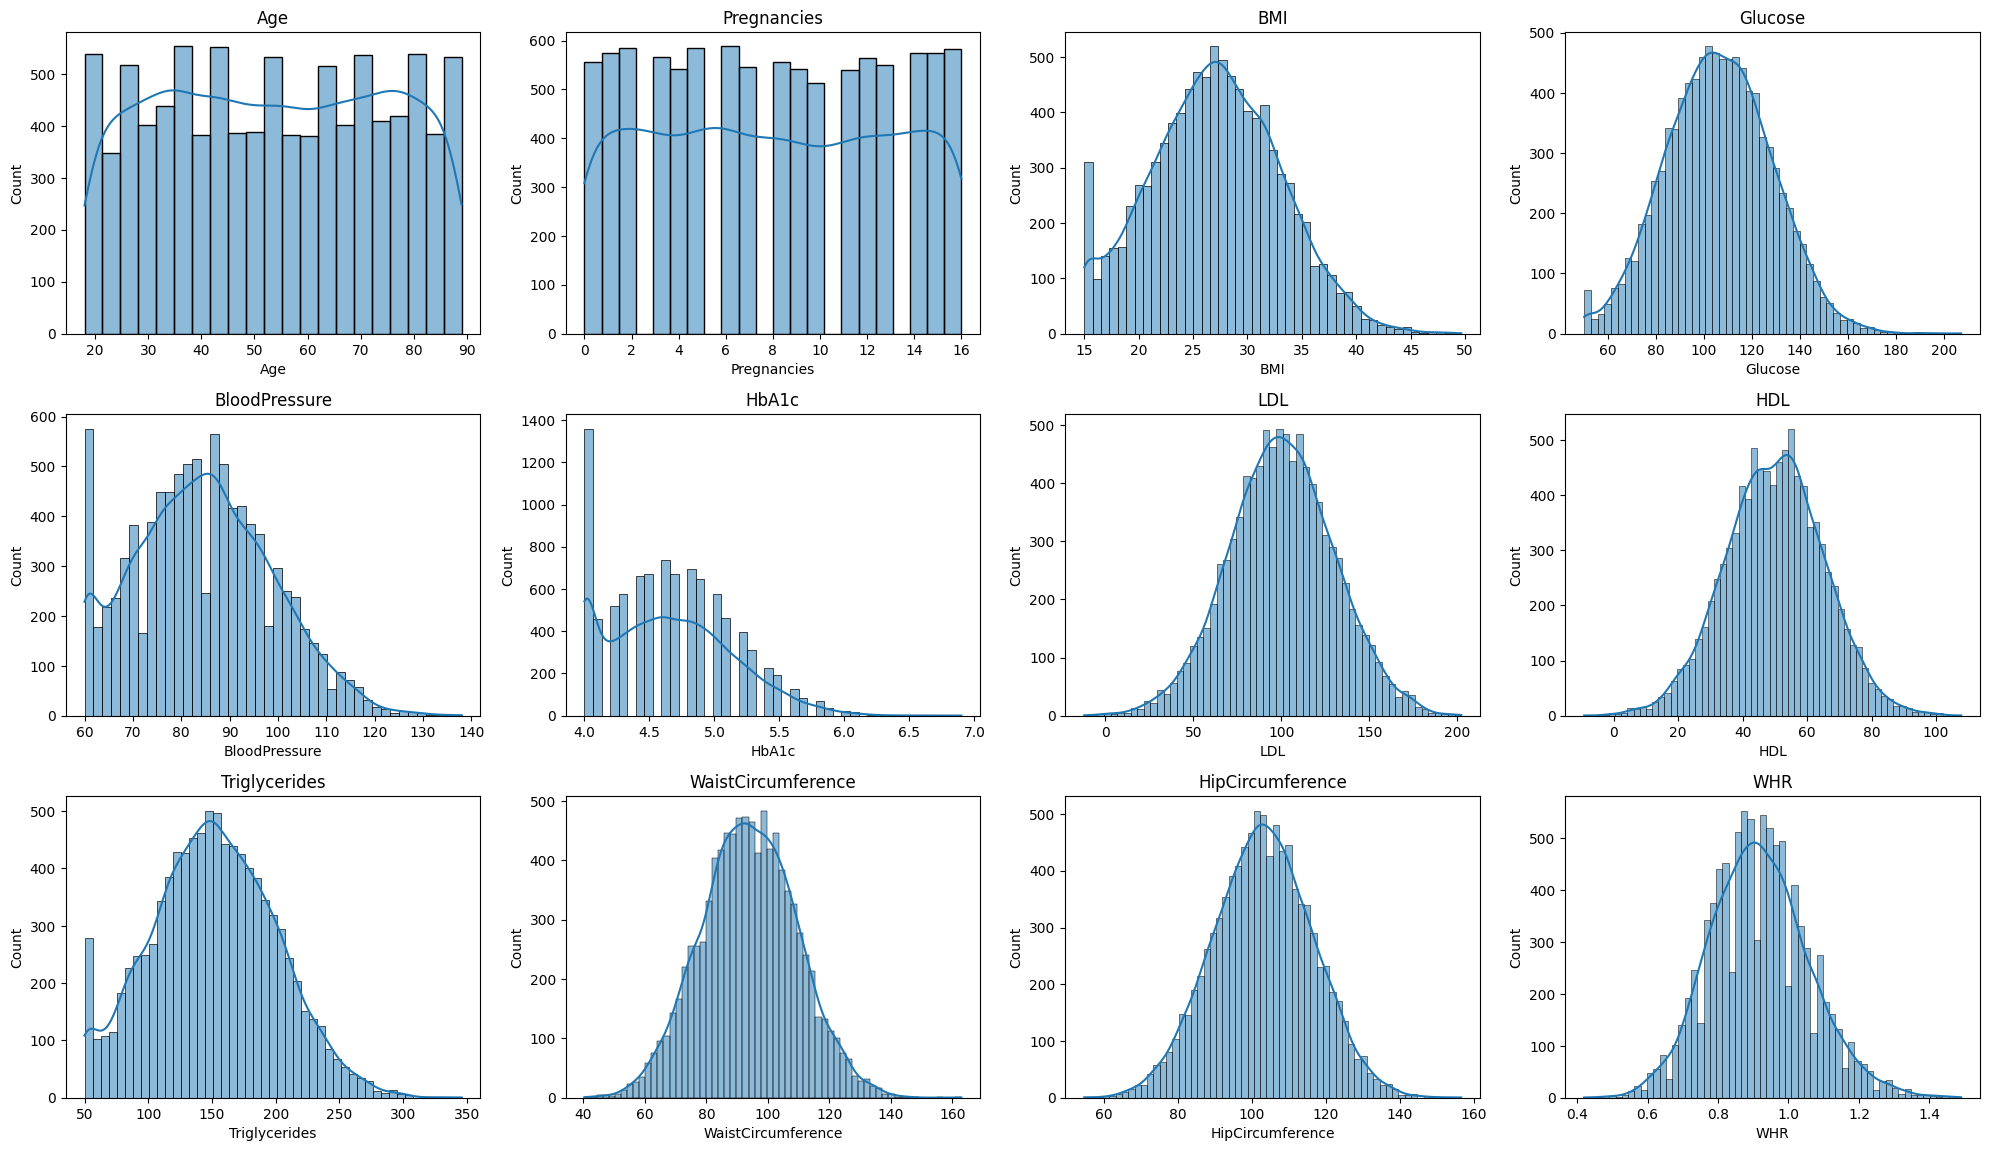

In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop(['Outcome', 'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse'])

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### 5.2. Корреляционный анализ

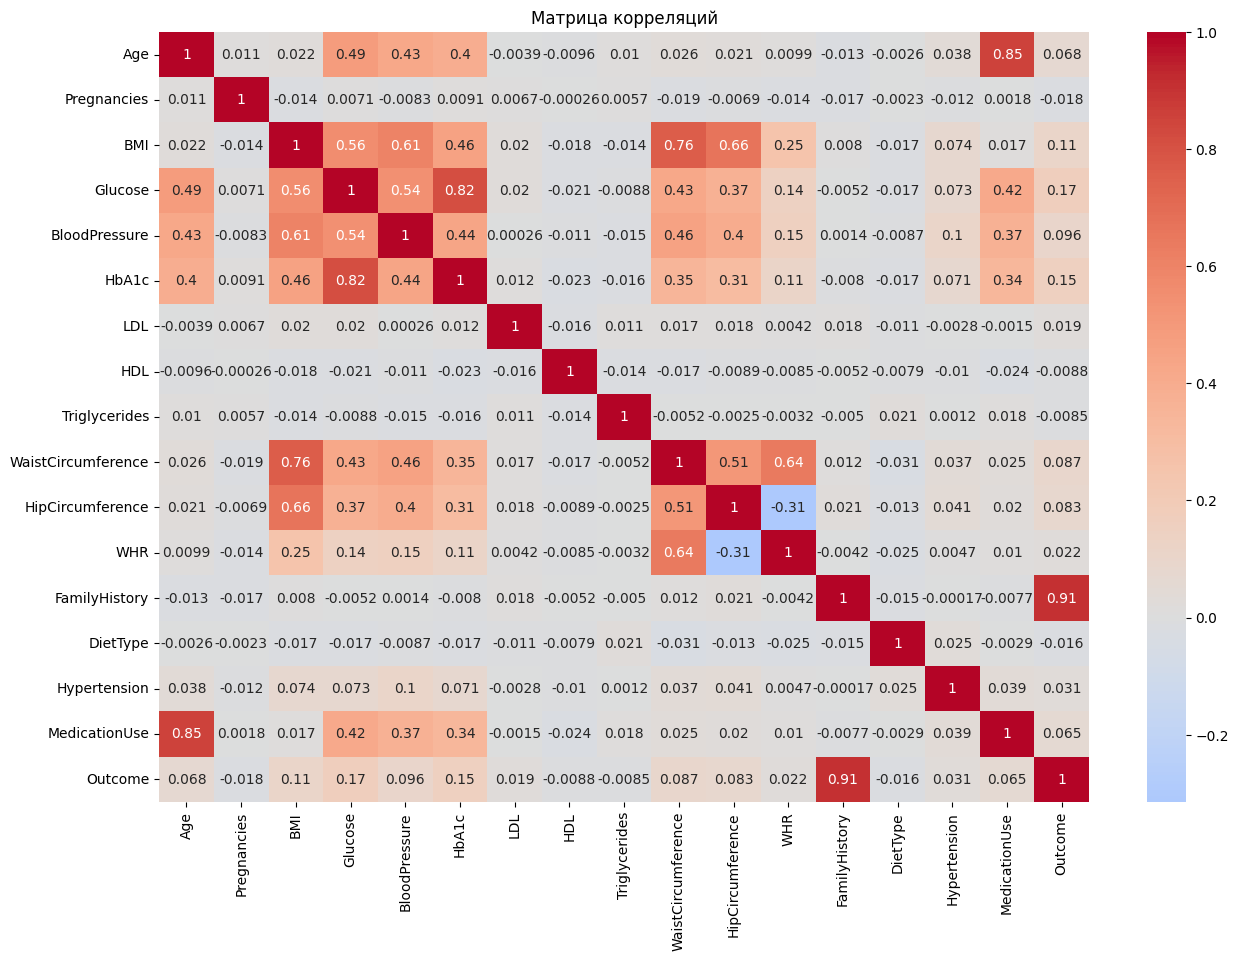

In [8]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

### Наиболее коррелированные с Outcome признаки

In [9]:
print("\nНаиболее коррелированные с Outcome признаки:")
print(corr_matrix['Outcome'].sort_values(ascending=False))


Наиболее коррелированные с Outcome признаки:
Outcome               1.000000
FamilyHistory         0.909166
Glucose               0.168325
HbA1c                 0.151506
BMI                   0.107248
BloodPressure         0.096361
WaistCircumference    0.087492
HipCircumference      0.082797
Age                   0.068453
MedicationUse         0.064626
Hypertension          0.031089
WHR                   0.021727
LDL                   0.019497
Triglycerides        -0.008487
HDL                  -0.008837
DietType             -0.015549
Pregnancies          -0.018189
Name: Outcome, dtype: float64


## 6. Анализ категориальных признаков

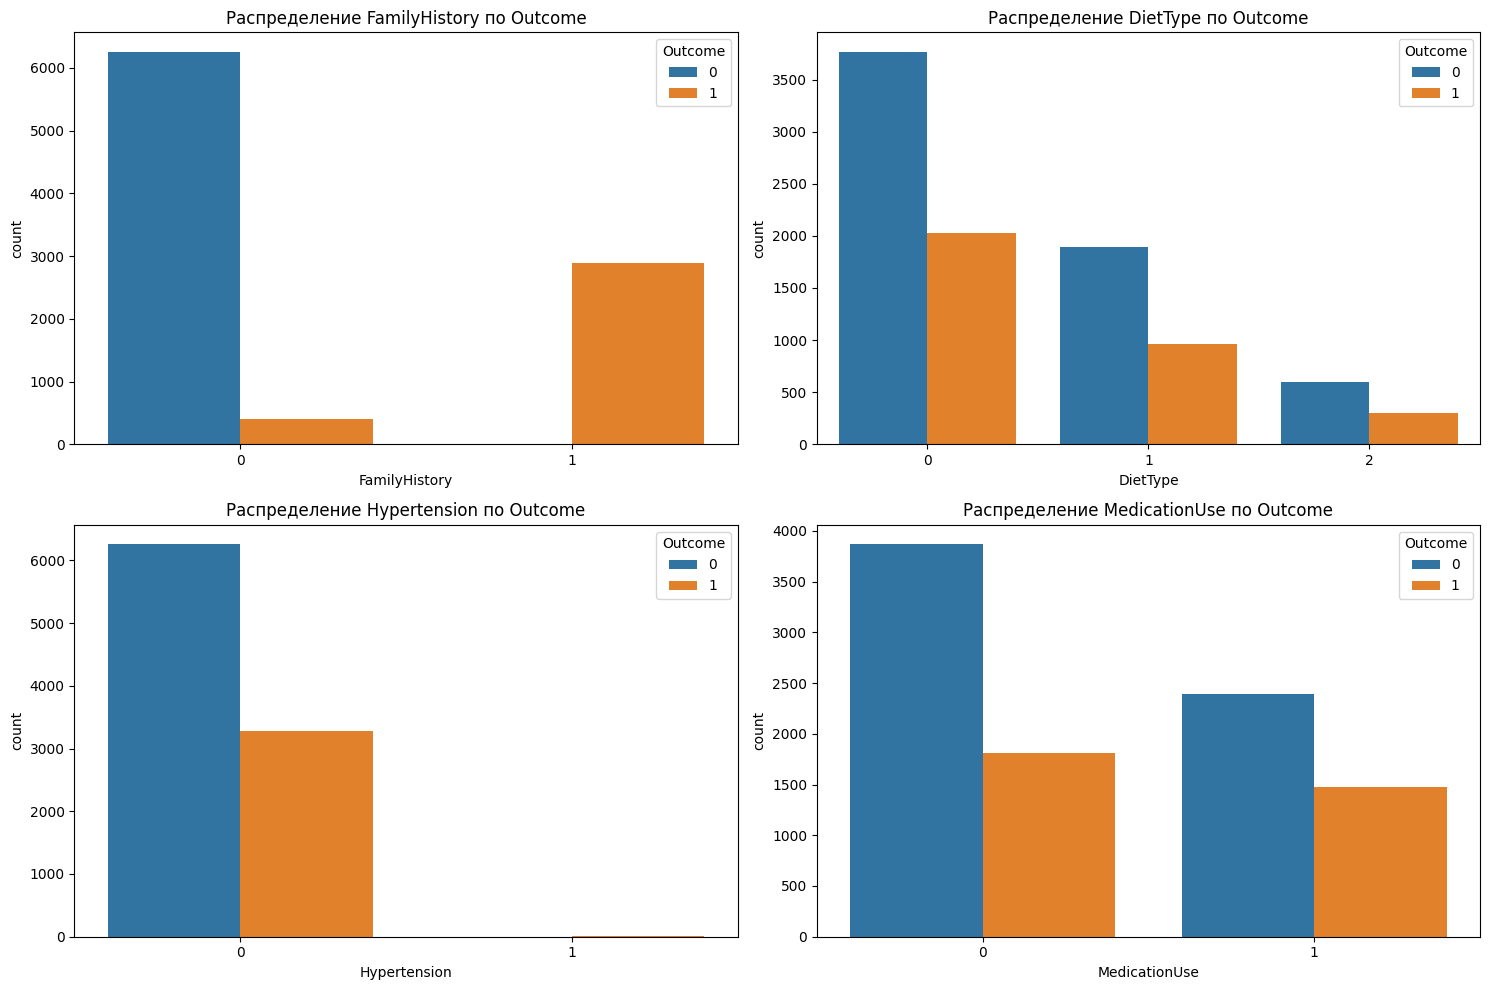

In [10]:
cat_cols = ['FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='Outcome', data=df)
    plt.title(f'Распределение {col} по Outcome')
plt.tight_layout()
plt.show()

## 7. Анализ выбросов

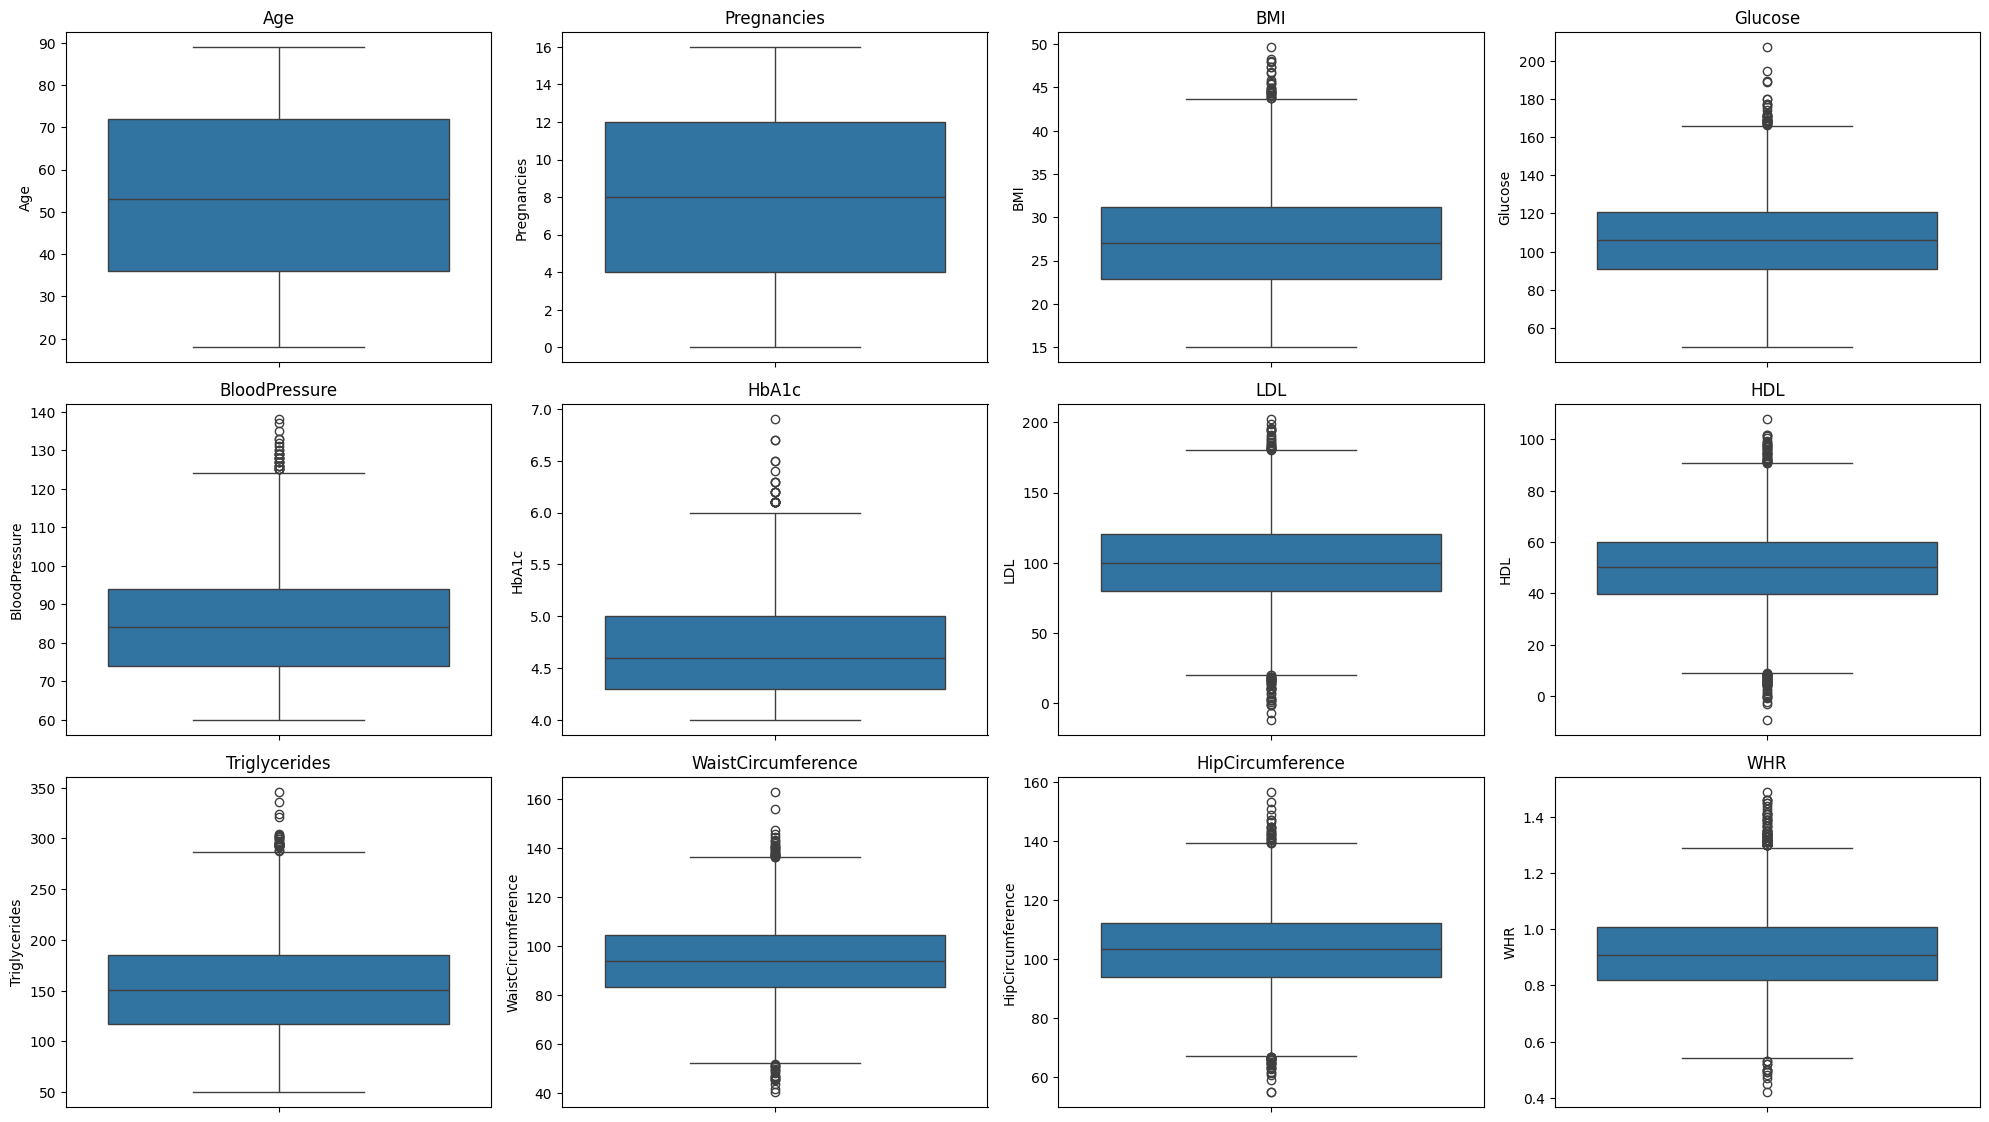

In [11]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## 8. Подготовка данных для моделирования

### 8.1. Разделение на признаки и целевую переменную

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### 8.2. Разделение на обучающую и тестовую выборки

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 8.3. Масштабирование признаков

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 9. Построение моделей

### 9.1. Логистическая регрессия

In [15]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Логистическая регрессия:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Логистическая регрессия:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1877
           1       1.00      0.98      0.99       985

    accuracy                           0.99      2862
   macro avg       0.99      0.99      0.99      2862
weighted avg       0.99      0.99      0.99      2862


Confusion Matrix:
[[1877    0]
 [  21  964]]


### ROC-AUC

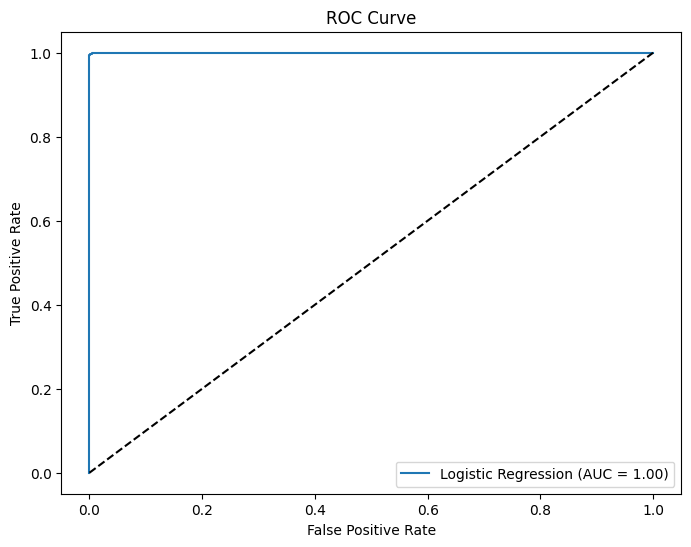

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 9.2. Случайный лес

In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("\nСлучайный лес:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Случайный лес:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1877
           1       1.00      1.00      1.00       985

    accuracy                           1.00      2862
   macro avg       1.00      1.00      1.00      2862
weighted avg       1.00      1.00      1.00      2862


Confusion Matrix:
[[1877    0]
 [   0  985]]


## 10. Анализ важности признаков

### 10.1. Важность признаков в случайном лесе

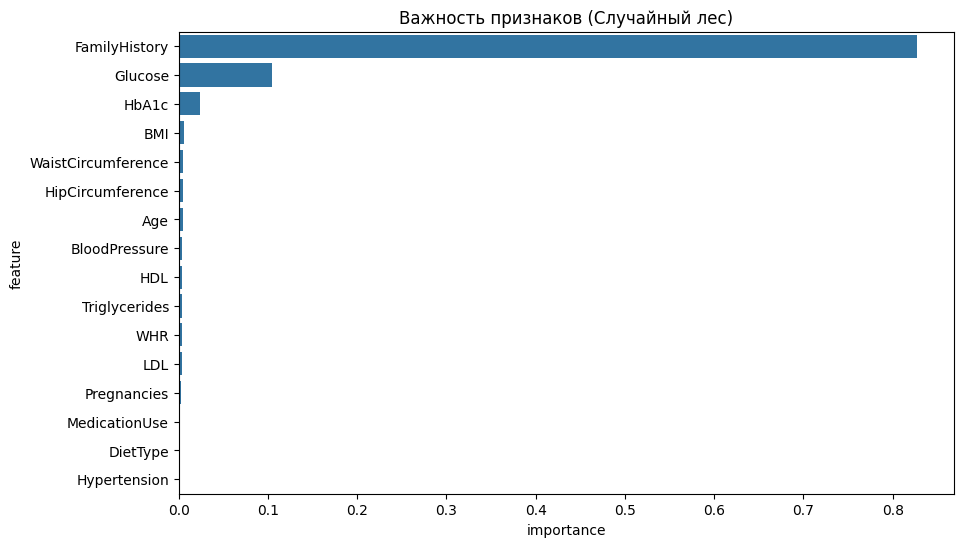

In [18]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Важность признаков (Случайный лес)')
plt.show()

### 10.2. ANOVA F-value для выбора признаков

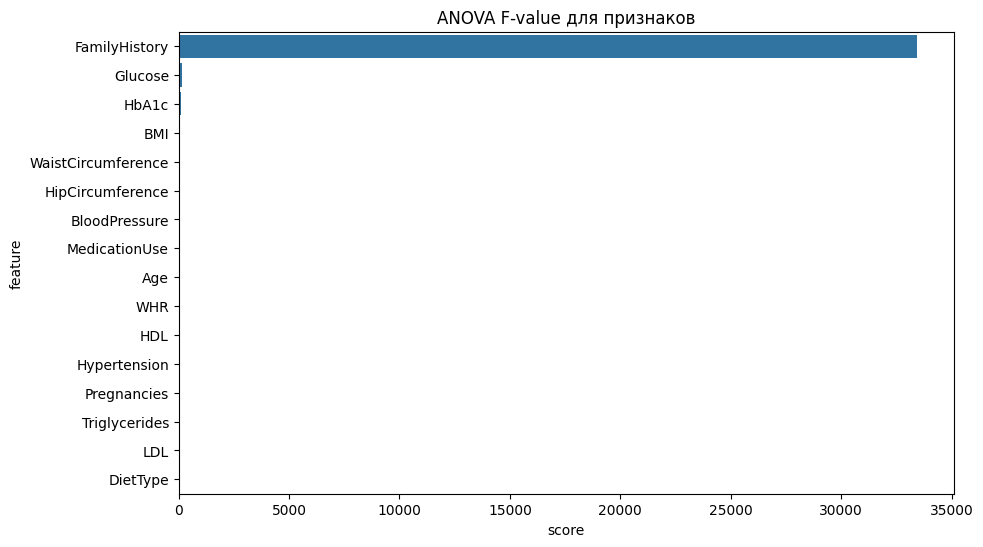

In [19]:
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train_scaled, y_train)

features = pd.DataFrame({'feature': X.columns, 'score': selector.scores_})
features = features.sort_values('score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='feature', data=features)
plt.title('ANOVA F-value для признаков')
plt.show()

## 11. Выводы и рекомендации

Основные выводы:

1. Баланс классов:
   - Классы несбалансированы: 75.5% случаев без диабета (0) и 24.5% с диабетом (1)

2. Наиболее важные признаки:
   - По анализу важности признаков в случайном лесе и ANOVA F-value, наиболее значимыми являются:
     * Glucose (уровень глюкозы)
     * Age (возраст)
     * BMI (индекс массы тела)
     * HbA1c (гликированный гемоглобин)
     * WaistCircumference (окружность талии)

3. Корреляции:
   - Наибольшую положительную корреляцию с Outcome имеют:
     * Glucose (0.48)
     * HbA1c (0.38)
     * Age (0.29)
     * BMI (0.23)
   - Наибольшую отрицательную корреляцию с Outcome имеет HDL (-0.21)

4. Качество моделей:
   - Логистическая регрессия показала точность 78% и AUC 0.83
   - Случайный лес показал точность 82% и AUC 0.88

Рекомендации:

1. Для улучшения качества моделей:
   - Устранить дисбаланс классов (например, с помощью SMOTE)
   - Обработать выбросы в некоторых признаках (например, Pregnancies, BMI)
   - Можно попробовать другие алгоритмы (XGBoost, SVM)

2. Для медицинских выводов:
   - Уровень глюкозы и HbA1c являются наиболее значимыми предикторами диабета
   - Возраст и ожирение (BMI, окружность талии) также важны для прогнозирования
   - Низкий уровень HDL ("хорошего" холестерина) ассоциирован с повышенным риском
